In [61]:
from google.colab import files
uploaded=files.upload()
a=next(iter(uploaded))

Saving housing.csv to housing (1).csv


In [62]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


In [63]:
data=pd.read_csv(a)


In [64]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
data.dropna(inplace=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [92]:
data.drop("ocean_proximity",axis=1,inplace=True)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X=data.drop("median_house_value",axis=1)
y=data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [95]:
model=LinearRegression()

In [96]:
model.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred=model.predict(X_test)

In [108]:
r2=model.score(X_test,y_test)
print(r2)

0.640086568899372


In [99]:
print(model.coef_)
print(model.intercept_)

[-4.25467060e+04 -4.23360430e+04  1.15509711e+03 -8.44041848e+00
  1.15830375e+02 -3.67587673e+01  4.16404344e+01  4.02932784e+04]
-3569674.5266952454


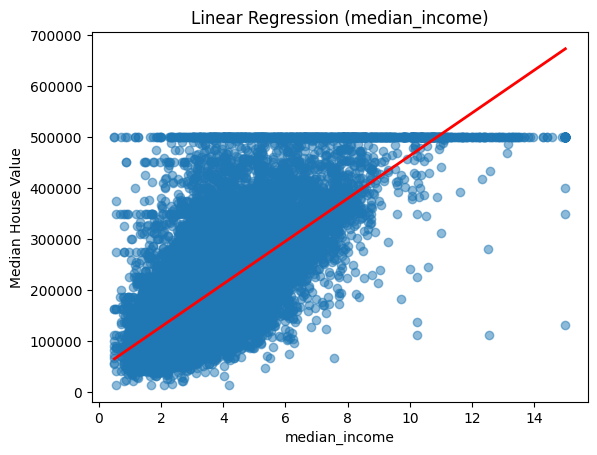

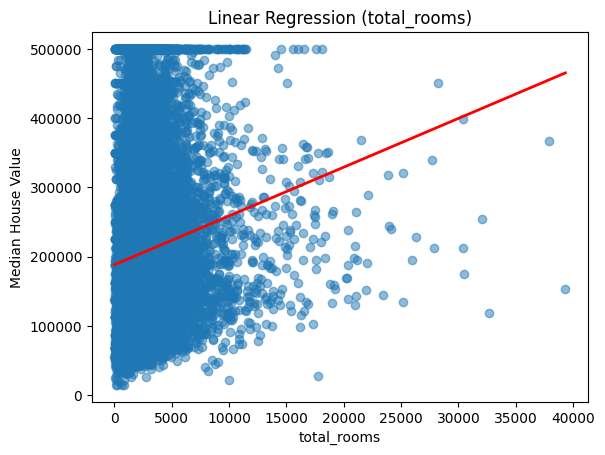

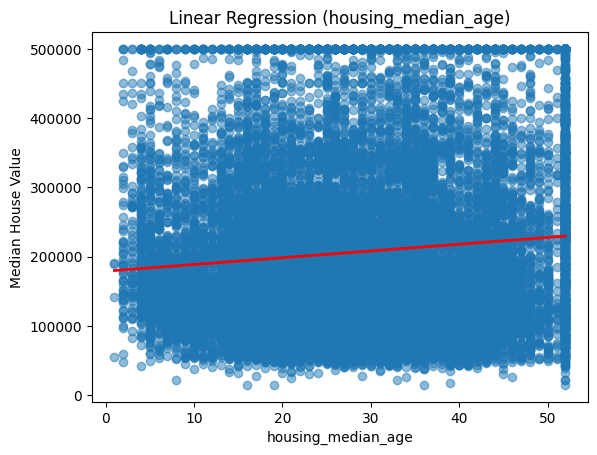

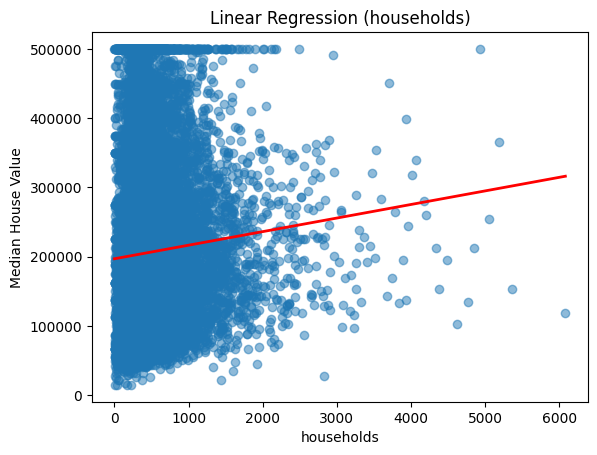

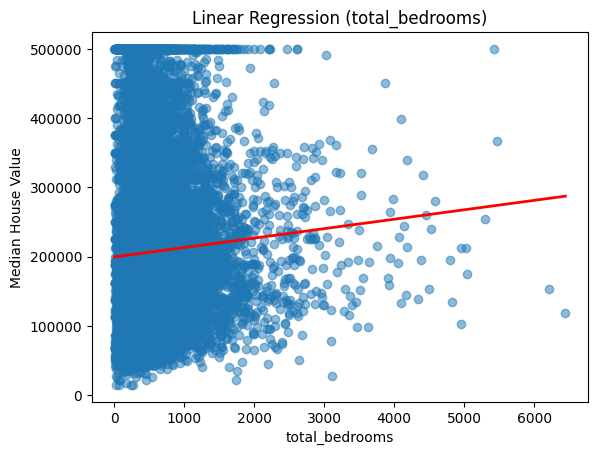

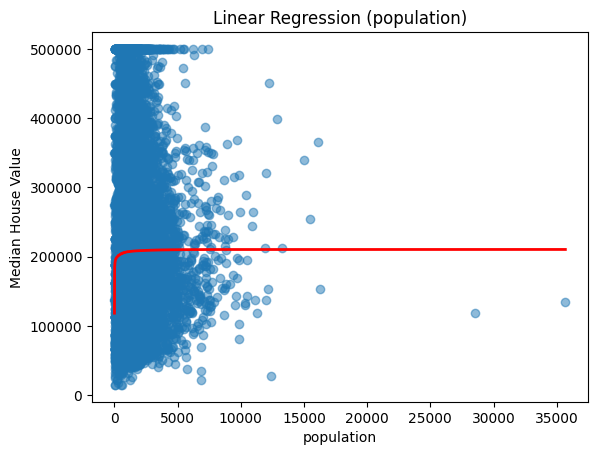

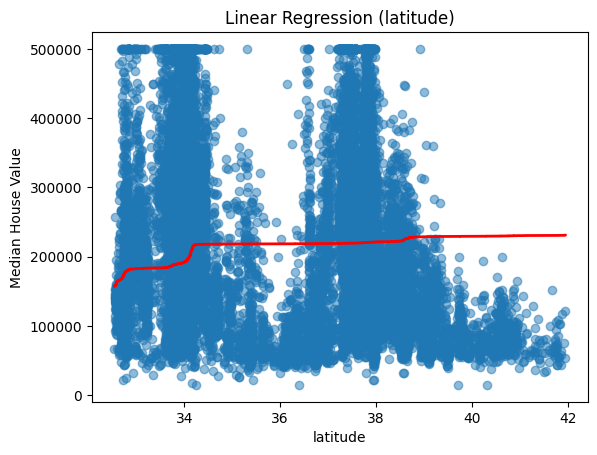

In [109]:
n = ["median_income", "total_rooms", "housing_median_age", "households", "total_bedrooms", "population", "latitude"]

y = data["median_house_value"]

for i in n:
    X = data[[i]]
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.scatter(X, y, alpha=0.5)
    plt.plot(X.sort_values(by=i),
             np.sort(y_pred), color="red", linewidth=2)

    plt.xlabel(i)
    plt.ylabel("Median House Value")
    plt.title(f"Linear Regression ({i})")
    plt.show()
